# Introduction

Back in 2015, data journalist Walt Hickey showed that Fandango, a website where you can buy movie tickets as well as review the movies you've seen, had much higher movie review scores than competitor movie review sites Metacritic, iMDB, and Rotten Tomatoes had (whose reviews fell more into the same ballpark as we'd expect). 

Link to article: https://fivethirtyeight.com/features/fandango-movies-ratings/

Fandango mentioned that they were going to address the issue, so for this project, we're going to analyze some of the site's movie review scores after 2015 to see if their ratings now fall in line with the other sites mentioned. We'll use the following datasets below:

- Fivethirtyeight's dataset of Fandango movie reviews in 2015 (fandango_score_comparison.csv): https://github.com/fivethirtyeight/data/tree/master/fandango

- Dataquest's dataset of Fandango movie reviews from 2016-2017 (movie_ratings_16_17):
https://github.com/mircealex/Movie_ratings_2016_17

In [2]:
# import our needed libraries
import pandas as pd

# read in our datasets
fandango_2015 = pd.read_csv("fandango_score_comparison.csv")
fandango_2016_2017 = pd.read_csv("movie_ratings_16_17.csv")

# let's look at a sample of fandango_2015 records to get a feel for the data
fandango_2015.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
# let's look at a sample of fandango_2016_2017 records to get a feel for the data
fandango_2016_2017.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


After getting a feel for our data, let's hone in on the Fandango ratings columns that we're interested in for each dataset to do our comparison.

In [4]:
# Pull all of the fandango rating columns from the 2015 dataset
fandango_2015_ratings_columns = fandango_2015[["FILM","Fandango_Stars","Fandango_Ratingvalue",
                                               "Fandango_votes","Fandango_Difference"]]

# show a sample of the above
fandango_2015_ratings_columns.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
# Pull the fandango rating columns from the 2016-2017 dataset
fandango_2016_2017_ratings_columns = fandango_2016_2017[["movie","year","fandango"]]

# show a sample of the above
fandango_2016_2017_ratings_columns.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


# Some Stats Analysis

In this project, we're going to apply the statistical concepts of sampling and frequency distribution analysis. For that, we're considering the all movies created as our population, and Walt Hickey's dataset as our sample of movie reviews and the 2016-2017 dataset asa sample of movie reviews.

How representative is Walt Hickey's dataset of the population of all movies? According to his article, he stated that he pulled data for 510 films that had ticket sales as of Aug. 24, 2015. Hickey then narrowed his list down to 209 movies that had 30 or more reviews so a suitable average score could be calculated. As a result, this sampling was not random, so it is unlikely to be representative of our population.

How representative is the 2016-2017 dataset of our population? According the README document within the github repo, the sample only contained the "most popular" movies based on number of votes (the exact threshold is unclear from the document). Therefore again, this sample of 214 was not selected at random, and this sample is therefore most likely not representative of our sample either.

# After further review of the data...

We've reached a bit of an impasse on our original goal: See if Fandango now provides more reasonable reviews for movies. We found that neither of our datasets are likely to be representative of our population of all movies, and since Fandango only shows movie ratings for movies they are currently selling tickets for folks to go see, we have no way of pulling movie reviews from past movies which would be needed for our sample to be more representative.

We have two options: throw in the towel and call it a day, or we can change our goal slightly so that we can still use our datasets and maybe glean something from them. Let's go with Option 2! Ultimately, we're trying to see if Fandango fixed their ratings system to line up more with what other review sites had as well. For this goal, we can just consider our "population" to be all popular (we're defining "popular" as having 30 reviews or more) movies rated by Fandango in 2015 and those rated in 2016-2017. Our 2015 and 2016-2017 datasets will be the respective samples that we will analyze.

Let's see how representative our sample sets are of the population of popular movies now by seeing how many movies within the datasets have 30 reviews or more. We know from Hickey's article that all of the movies in his sample have 30 reviews or more because he used that exact criteria when denoting a movie as popular. 

Our 2016-2017 dataset does not have a definition for "popular" nor does it have the number of ratings unfortunately. We should expect to see a majority of the movies having 30 reviews or more (roughly 75% of the dataset). To check, we can take a sample of this dataset and see what we find on the Fandango movie rating site.

In [6]:
# check to see how many popular movies are within our 2015 dataset
fandango_2016_2017_ratings_columns_sample = fandango_2016_2017_ratings_columns.sample(10, random_state=1)

# show the movies from our sample
fandango_2016_2017_ratings_columns_sample

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Unfortunately, when going to check the Fandango site as of September 2019, it looks like they no longer show their own movie ratings and instead reference Rotten Tomatoes for their scores.

At this point, this is where we would really throw in the towel as the answer to our goal would be that Fandango decided to remove their own movie rating system altogether.

For the sake of learning though, we'll continue forth with this Dataquest exercise and pretend it's April 2018, a time when the Fandango movie rating system still existed.

This is what we found from looking at number of Fandango ratings captured by the solution notebook https://github.com/dataquestio/solutions/blob/master/Mission288Solutions.ipynb:

Movies and number of Fandango Ratings
- Mechanic Resurrection: 2247
- Warcraft: 7271
- Max Steel: 493
- Me Before You: 5263
- Fantastic Beasts and Where to Find Them: 13400
- Cell: 17
- Genius: 127
- Sully: 11877
- A Hologram for the King: 500
- Captain America: Civil War 35057

From the historical numbers, 90% of the movies are considered popular by our metric, so we'll move forward with our 2016-2017 dataset.

Now we just need to make sure the 2015 dataset only has movies from 2015. We'll do the same for the 2016-2017 dataset, and we'll just make it the 2017 dataset.

In [23]:
# make sure that there are only 2015 films in the 2015 dataset
year = fandango_2015_ratings_columns["FILM"].str[-5:-1]
fandango_just_2015 = fandango_2015_ratings_columns[year=='2015']

# show the unique years here
fandango_just_2015["FILM"].str[-5:-1].value_counts()

2015    129
Name: FILM, dtype: int64

In [26]:
# make sure that there are only 2016 films in the 2016-2017 dataset
fandango_just_2016 = fandango_2016_2017_ratings_columns[
    fandango_2016_2017_ratings_columns["year"]==2016]

# show the unique years here
fandango_just_2016["year"].value_counts()

2016    191
Name: year, dtype: int64

Now that we have set up our data properly, we can now check and see if there is any difference between Fandango's 2015 movie ratings and their 2016 ratings. Let's start with a high-level analysis by looking at the shape of the distributions.

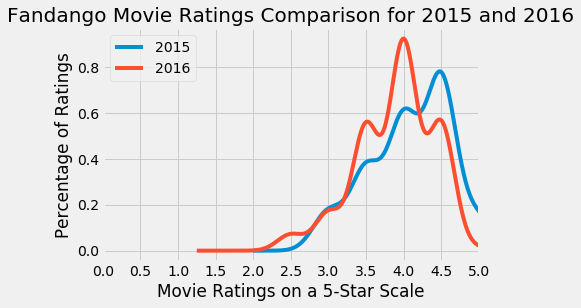

In [61]:
# import our needed packages
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# plot our kernel density plots
plt.style.use('fivethirtyeight')
ax1 = fandango_just_2015["Fandango_Stars"].plot.kde(label='2015')
ax2 = fandango_just_2016["fandango"].plot.kde(label='2016')
plt.title('Fandango Movie Ratings Comparison for 2015 and 2016',fontsize=20)
plt.xlabel('Movie Ratings on a 5-Star Scale')
plt.ylabel('Percentage of Ratings')

# set the range for our x-tick marks
xticks = np.arange(0,5.5,.5)
plt.xlim(0,5)
plt.xticks(xticks)
plt.legend()

# Analysis of Kernel Density Plots
It looks like the 2016 movie ratings land more around 4 stars, and it's skewed left but has a more normal distribution between 4.75 stars and 3 stars. The 2015 movie ratings on the other hand trends upwards and skews heavily left, with most of the movie ratings landing around 4.5 stars.

Since we can see now that ratings were a bit lower in 2016 versus in 2015, let's now look at frequency distribution tables of the movie ratings.

In [73]:
# frequency distribution of 2015 reviews
fandango_just_2015["Fandango_Stars"].value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [74]:
# frequency distribution of 2016 reviews
fandango_just_2016["fandango"].value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

# Analysis of Frequency Distribution Tables
It looks like there are indeed more lower ratings for the 2016 movies than 2015. As we noted above as well, it looks like it's relatively even between 3.5 and 4.5 stars. While better, this is still pretty high, as we'd most likely expect the average to be in the middle at 2.5 - 3 stars for all movies.

It's hard to tell the direction of the chnage just by looking at these tables though, so let's generate some summary statistics.

In [90]:
# Compute the mean, median, and mode for each dataset for 2015
mean_2015 = fandango_just_2015["Fandango_Stars"].mean()
median_2015 = fandango_just_2015["Fandango_Stars"].median()
mode_2015 = fandango_just_2015["Fandango_Stars"].mode()[0]

# Compute the mean, median, and mode for each dataset for 2016
mean_2016 = fandango_just_2016["fandango"].mean()
median_2016 = fandango_just_2016["fandango"].median()
mode_2016 = fandango_just_2016["fandango"].mode()[0]

# create a dataframe to show the summary statistics in a table
summary_dataframe = pd.DataFrame({"2015":[mean_2015,median_2015,mode_2015],
                                  "2016":[mean_2016,median_2016,mode_2016]})

# re-label the indices
summary_dataframe.index = ['mean','median','mode']

# show the summary statistics
summary_dataframe

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


It looks like there's a slight difference from the summary statistics just by eye-balling the numbers. Let's visualize this table to get a better view.

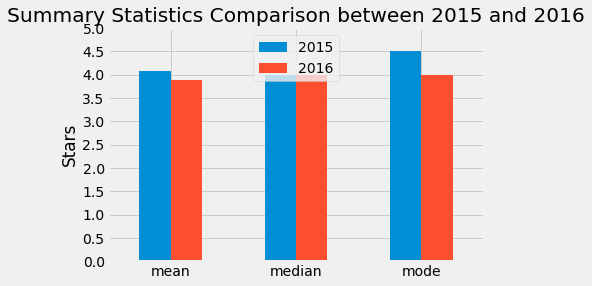

In [99]:
# use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# plot the summary dataframe
summary_dataframe.plot.bar(title='Summary Statistics Comparison between 2015 and 2016',rot=0)

# create the range for the y-axis labels to be the ratings on the 5 star scale
yticks = np.arange(0,5.5,.5)
plt.yticks(yticks)
plt.ylabel('Stars')
plt.legend(loc='upper center')

# Conclusion

It looks like the lower average and mode of movie ratings in 2016 does lead us to conclude that Fandango ratings did lower but ultimately by not that much. Maybe after Hickey's article, a glut of data scientists took it upon themselve to keep Fandango honest and add another project to their portfolios. Probably sick of blog posts of how wrong Fandango ratings are, the company may then have decided to do away with them altogether and show just the Rotten Tomatoes score.

Thank you for joining me on this project! See you next time.